# 🌞 **Solar Eclipse Analysis (1901–2100)**

# 1️⃣ **Introduction**

This project analyzes the dataset solar-eclipses.csv, which contains information about solar eclipses occurring and predicted between 1901 and 2100. The purpose is to explore eclipse durations, identify the longest events, and project future eclipses.

A **solar eclipse** occurs when the Moon passes between the Earth and the Sun, partially or completely blocking sunlight. Main eclipse types:

* **Total Solar Eclipse:** The Moon fully covers the Sun, casting a shadow on Earth and revealing the solar corona.

* **Partial Solar Eclipse**: The Moon obscures part of the Sun, creating a crescent appearance.

* **Annular Solar Eclipse:** The Moon covers the Sun’s center, leaving a “ring of fire” around the edges.

The dataset contains duration (formatted as minutes and seconds) and total_seconds (the duration in seconds).

# **2️⃣ Research Questions**

1. What is the average duration of total darkness during a total solar
eclipse?

2. When did the longest solar eclipse occur?

3. Which is the longest total solar eclipse?

4. What is the average duration per eclipse type?

5. Which eclipses are scheduled in the future?

# **3️⃣ Data Processing and Cleaning**

In [176]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

# Load dataset
df = pd.read_csv('solar-eclipses.csv')

# Remove rows with missing 'duration'
df = df.dropna(subset=['duration'])
df = df.copy()

# Clean 'duration' column
df['duration'] = df['duration'].astype(str).str.strip()
df['duration'] = df['duration'].str.replace('s$', '', regex=True)

# Split duration into minutes and seconds
duration = df['duration'].str.split('m', expand=True)
df[['m','s']] = duration

# Convert minutes and seconds to integers
df[['m', 's']] = df[['m', 's']].astype(int)

# Convert minutes to seconds
df[['m']] = df[['m']].apply(lambda x: x*60)

# Calculate total seconds
df['total_seconds'] = df['m'] + df['s']

# Normalize eclipse type names
df['eclipse_type'] = df['eclipse_type'].astype(str).str.strip().str.title()

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])




# **4️⃣ Exploratory Analysis**
**Longest eclipse overall:**


In [177]:

max_value = df['total_seconds'].max()
longest_eclipse = df.query('total_seconds == @max_value')
longest_eclipse


,date,eclipse_type,magnitude,duration,region,m,s,total_seconds
126,1955-12-14,Annular,0.918,12m09,"c & e Africa, Mid East, Asia, East Indies [Annular: Chad, Sudan, Ethiopia, Somalia, Myanmar, Thailand, Laos, Vietnam, se China]",720,9,729


**Longest total eclipse:**

In [178]:
max_value_total = df.loc[df['eclipse_type'] == 'Total', 'total_seconds'].max()
longest_total_eclipse = df.query('eclipse_type == "Total" and total_seconds == @max_value_total')
longest_total_eclipse


,date,eclipse_type,magnitude,duration,region,m,s,total_seconds
125,1955-06-20,Total,1.078,07m08,"e Africa, e Asia, East Indies, n Australia [Total: Sri Lanka, Myanmar, Thailand, Laos, Cambodia, Vietnam, Philippines]",420,8,428


**Average duration per eclipse type:**

In [179]:
average_duration = df.groupby('eclipse_type')['total_seconds'].mean().round(2)
average_duration

,total_seconds
eclipse_type,
Annular,288.51
Hybrid,30.77
Total,211.96


**Upcoming eclipses:**

In [181]:
today = pd.Timestamp('today').normalize()
next_eclipses = df[df['date'] >= today]
next_eclipses.head(10)


,date,eclipse_type,magnitude,duration,region,m,s,total_seconds
276,2026-02-17,Annular,0.963,02m20,"s Argentina & Chile, s Africa, Antarctica [Annular: Antarctica]",120,20,140
277,2026-08-12,Total,1.039,02m18,"n N. America, w Africa, Europe [Total: Arctic, Greenland, Iceland, Spain]",120,18,138
278,2027-02-06,Annular,0.928,07m51,"S. America, Antarctica, w & s Africa [Annular: Chile, Argentina, Atlantic]",420,51,471
279,2027-08-02,Total,1.079,06m23,"Africa, Europe, Mid East, w & s Asia [Total:Morocco, Spain, Algeria, Libya, Egypt, Saudi Arabia, Yemen, Somalia]",360,23,383
280,2028-01-26,Annular,0.921,10m27,"e N. America, C. & S. America, w Europe, nw Africa [Annular: Ecuador, Peru, Brazil, Suriname, Spain, Portugal]",600,27,627
281,2028-07-22,Total,1.056,05m10,"SE Asia, E. Indies, Australia, N.Z. [Total: Australia, N. Z.]",300,10,310
286,2030-06-01,Annular,0.944,05m21,"Europe, n Africa, Mid East, Asia, Arctic, Alaska [Annular: Algeria, Tunisia, Greece, Turkey, Russia, n. China, Japan]",300,21,321
287,2030-11-25,Total,1.047,03m44,"s Africa, s Indian Oc., E. Indies, Australia, Antarctica [Total: Botswana, S. Africa, Australia]",180,44,224
288,2031-05-21,Annular,0.959,05m26,"Africa, s Asia, E. Indies, Australia [Annular: Angola, Congo, Zambia, Tanzania, s. India, Malaysia, Indonesia]",300,26,326
289,2031-11-14,Hybrid,1.011,01m08,"Pacific, s US, C. America, nw S. America [Hybrid: Pacific, Panama]",60,8,68


# **5️⃣ Visualizations**

**1️⃣ Average Duration per Eclipse Type**

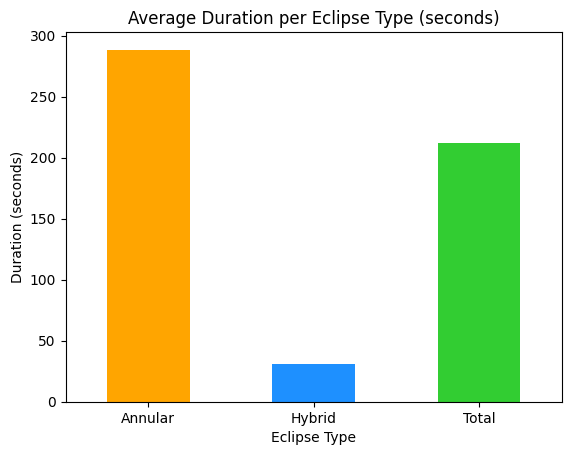

In [182]:
import matplotlib.pyplot as plt

average_duration.plot(kind='bar', color=['#FFA500', '#1E90FF', '#32CD32'])
plt.title('Average Duration per Eclipse Type (seconds)')
plt.ylabel('Duration (seconds)')
plt.xlabel('Eclipse Type')
plt.xticks(rotation=0)
plt.show()


**2️⃣ Timeline of Longest Total Eclipses**

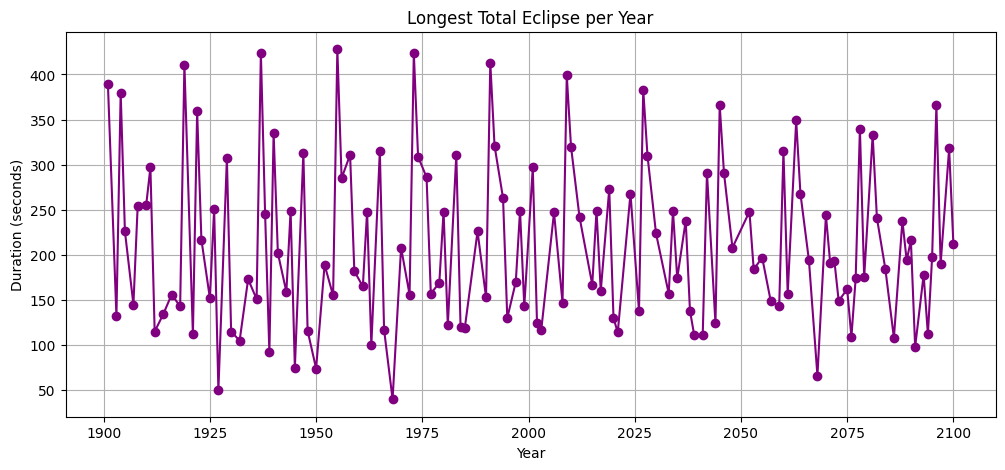

In [183]:
# Group by year for total eclipses and get max per year
total_eclipses = df[df['eclipse_type'] == 'Total']
max_per_year = total_eclipses.groupby(total_eclipses['date'].dt.year)['total_seconds'].max()

plt.figure(figsize=(12,5))
max_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Longest Total Eclipse per Year')
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()


# **Key Findings**

* **Longest eclipse overall:** The longest eclipse in the dataset occurred on 1955-12-14, with a duration of 12 minutes 09 seconds (729 seconds).

* **Longest total eclipse:** The longest total solar eclipse in the dataset occurred on 1955-06-20, lasting 7 minutes 08 seconds (428 seconds).

* **Average duration by eclipse type:**

  * **Annular:** 288.51 seconds

  * **Hybrid:** 30.77 seconds

  * **Total:** 211.96 seconds

* **Frequency of long total eclipses:** Long total eclipses that exceed ~400 seconds appear irregularly, typically occurring on multi-decade intervals (roughly every 10–20 years in the historical record).

* **Recent long eclipses:** Based on the timeline of maximum total-eclipse durations, the most recent events surpassing ~400 seconds occurred in the early 2000s (roughly within the 2000–2010 window).

* **Shortest long-eclipse periods:** The timeline indicates notably shorter maximum durations around the 1970s.

* **Upcoming eclipses:** The dataset contains several future eclipses of interest; for example, a total eclipse on 2026-08-12 with an expected duration of 2 minutes 18 seconds (138 seconds), plus a series of notable annular and total events through the 2020s and early 2030s.

# **📝 Conclusion**

The analysis of solar eclipses from 1901 to 2100 reveals significant variations in eclipse durations, with the longest eclipses occurring in the mid-20th century. The upcoming eclipses, particularly the one on August 12, 2026, offer opportunities for observation, though they will be shorter in duration compared to historical events. Understanding these patterns can enhance our appreciation and anticipation of future solar eclipses.